In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from collections import OrderedDict
from operator import itemgetter
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.stats import randint as sp_randint

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
hap = pd.read_csv('Happiness2015.csv')

In [3]:
hap.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
hap.info

<bound method DataFrame.info of                       Country                           Region  \
0                 Switzerland                   Western Europe   
1                     Iceland                   Western Europe   
2                     Denmark                   Western Europe   
3                      Norway                   Western Europe   
4                      Canada                    North America   
5                     Finland                   Western Europe   
6                 Netherlands                   Western Europe   
7                      Sweden                   Western Europe   
8                 New Zealand        Australia and New Zealand   
9                   Australia        Australia and New Zealand   
10                     Israel  Middle East and Northern Africa   
11                 Costa Rica      Latin America and Caribbean   
12                    Austria                   Western Europe   
13                     Mexico      Latin Ame

In [5]:
hap.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [6]:
hap.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Standard Error': 'Standard_Error', 'Economy (GDP per Capita)': 'Economy','Health (Life Expectancy)': 'Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government', 'Dystopia Residual': 'Dystopia_Residual'}, inplace=True)

In [7]:
hap.columns.tolist()

['Country',
 'Region',
 'Happiness_Rank',
 'Happiness_Score',
 'Standard_Error',
 'Economy',
 'Family',
 'Life_Expectancy',
 'Freedom',
 'Trust_Government',
 'Generosity',
 'Dystopia_Residual']

In [8]:
hap.isnull().any()

Country              False
Region               False
Happiness_Rank       False
Happiness_Score      False
Standard_Error       False
Economy              False
Family               False
Life_Expectancy      False
Freedom              False
Trust_Government     False
Generosity           False
Dystopia_Residual    False
dtype: bool

Good news is that there are no null values. Need not spend time cleaning and adjusting!!!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111eea450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115846f10>]], dtype=object)

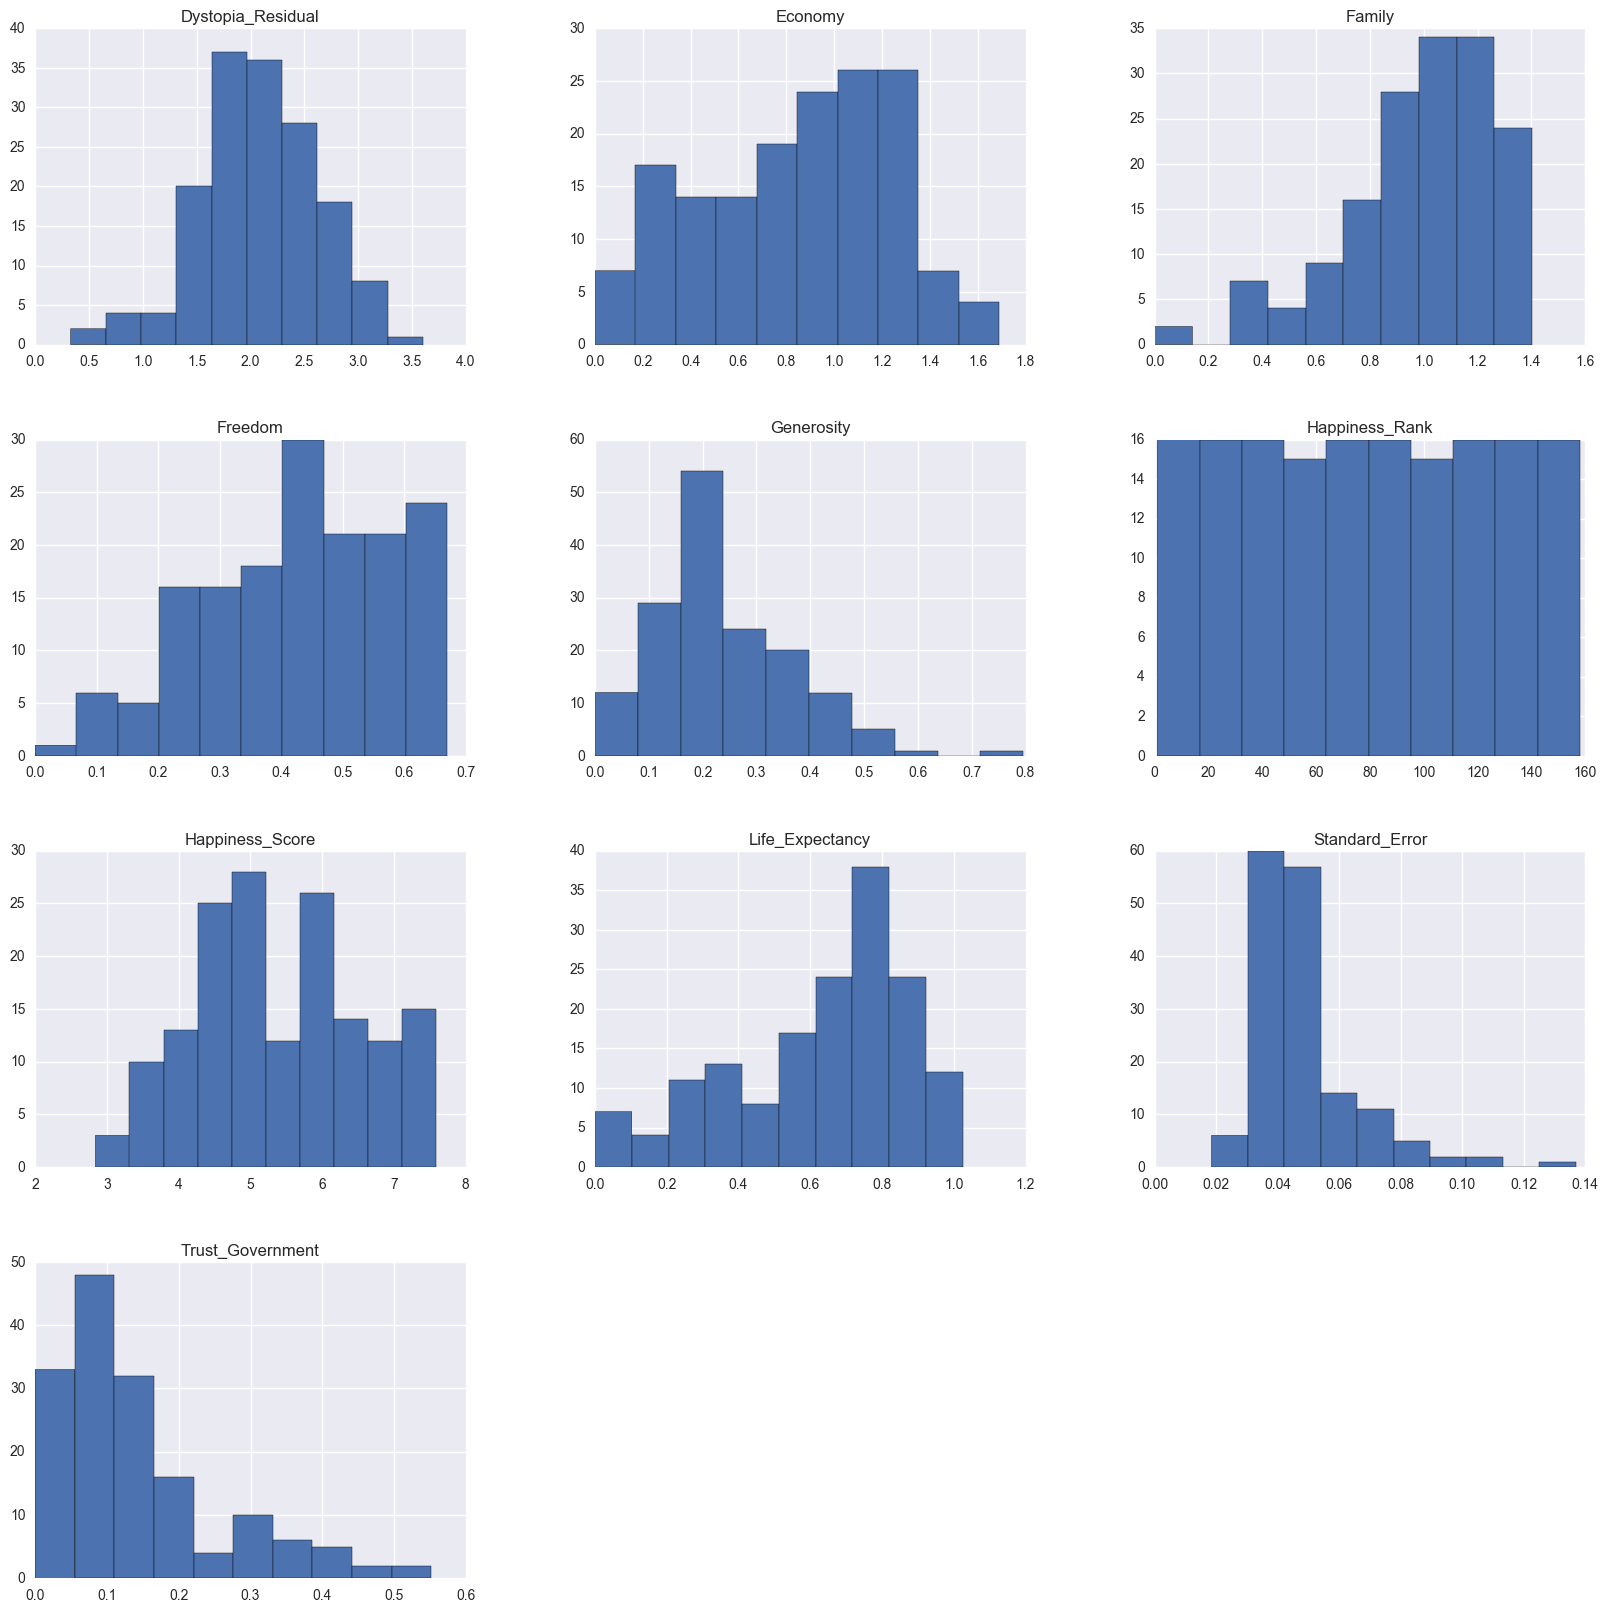

In [9]:
hap.hist(figsize = (20,20))

In [10]:
hapWE = hap[hap.Region == 'Western Europe']

In [11]:
hapWE.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Trust_Government,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


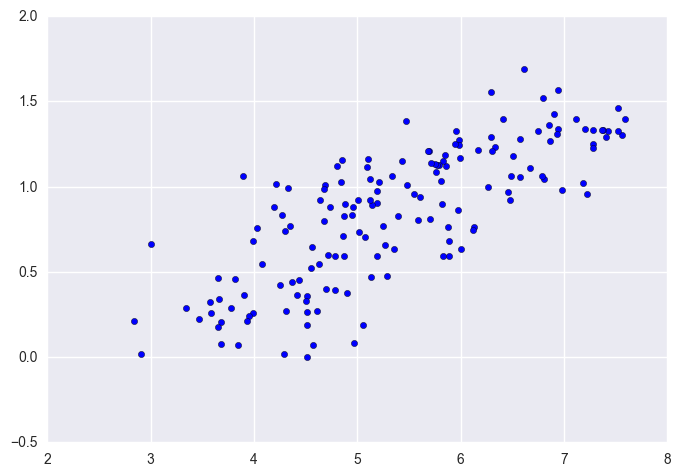

In [12]:
plt.scatter(hap['Happiness_Score'], hap['Economy'])

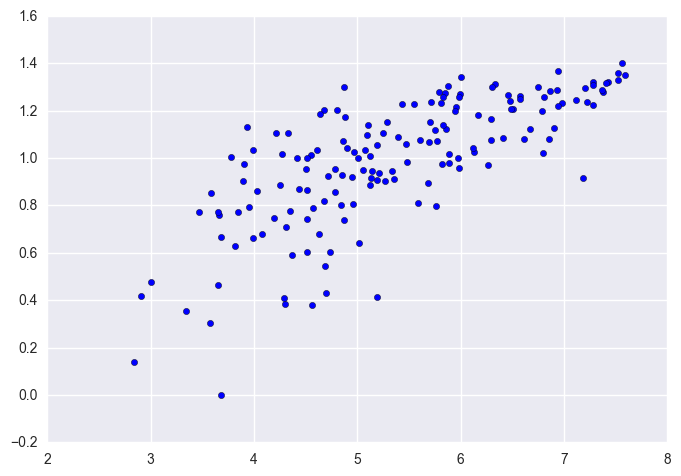

In [13]:
plt.scatter(hap['Happiness_Score'], hap['Family'])

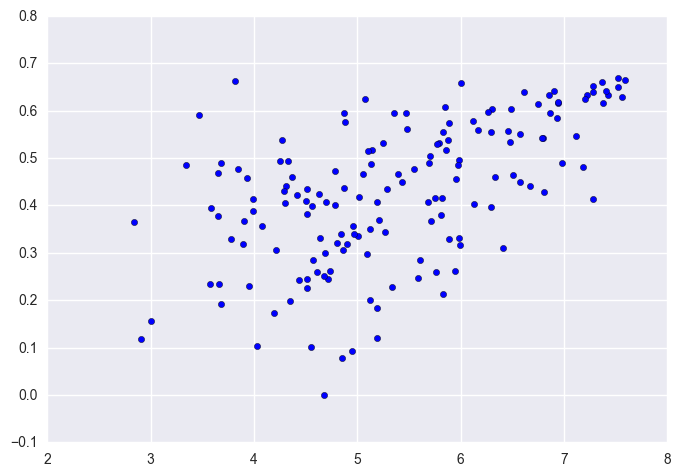

In [14]:
plt.scatter(hap['Happiness_Score'], hap['Freedom'])

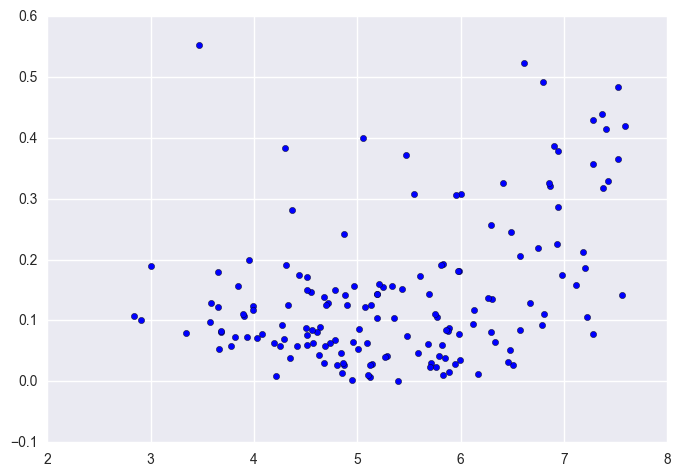

In [15]:
plt.scatter(hap['Happiness_Score'], hap['Trust_Government'])

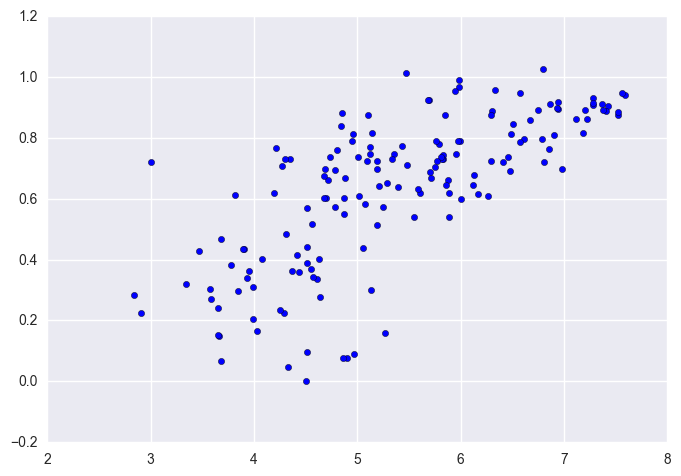

In [16]:
plt.scatter(hap['Happiness_Score'], hap['Life_Expectancy'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

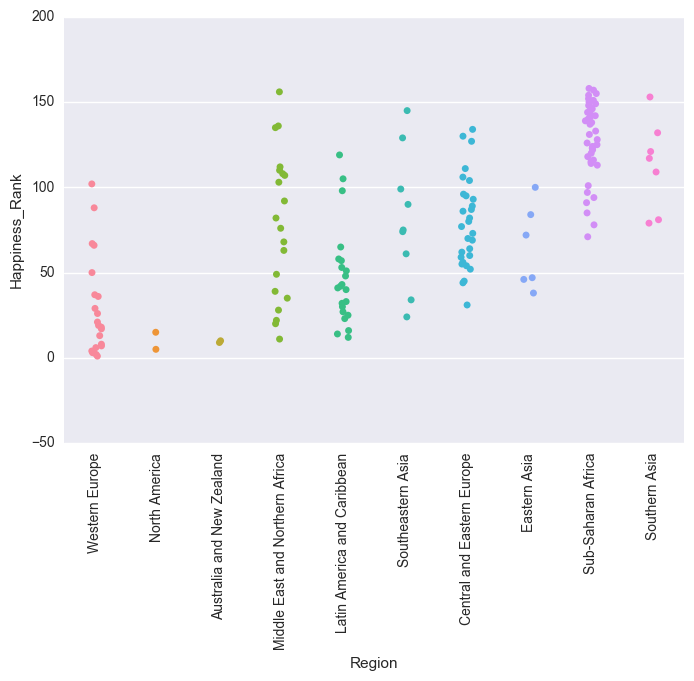

In [17]:
g = sb.stripplot(x="Region", y="Happiness_Rank", data=hap, jitter=True)
plt.xticks(rotation=90)

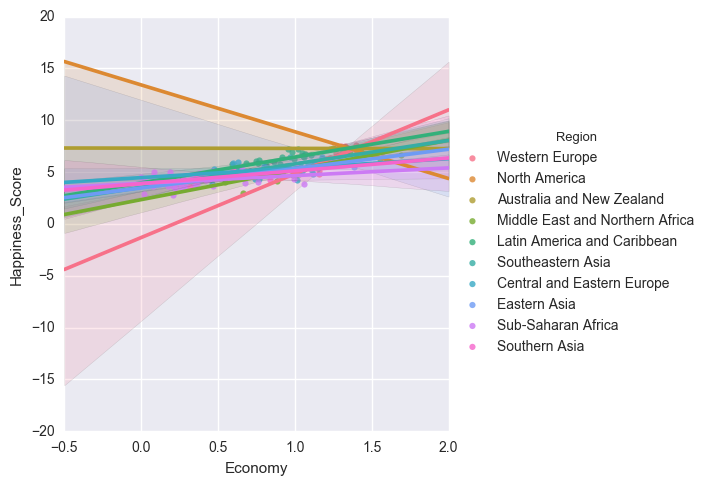

In [18]:

sb.lmplot(data=hap,x='Economy',y='Happiness_Score',hue="Region")

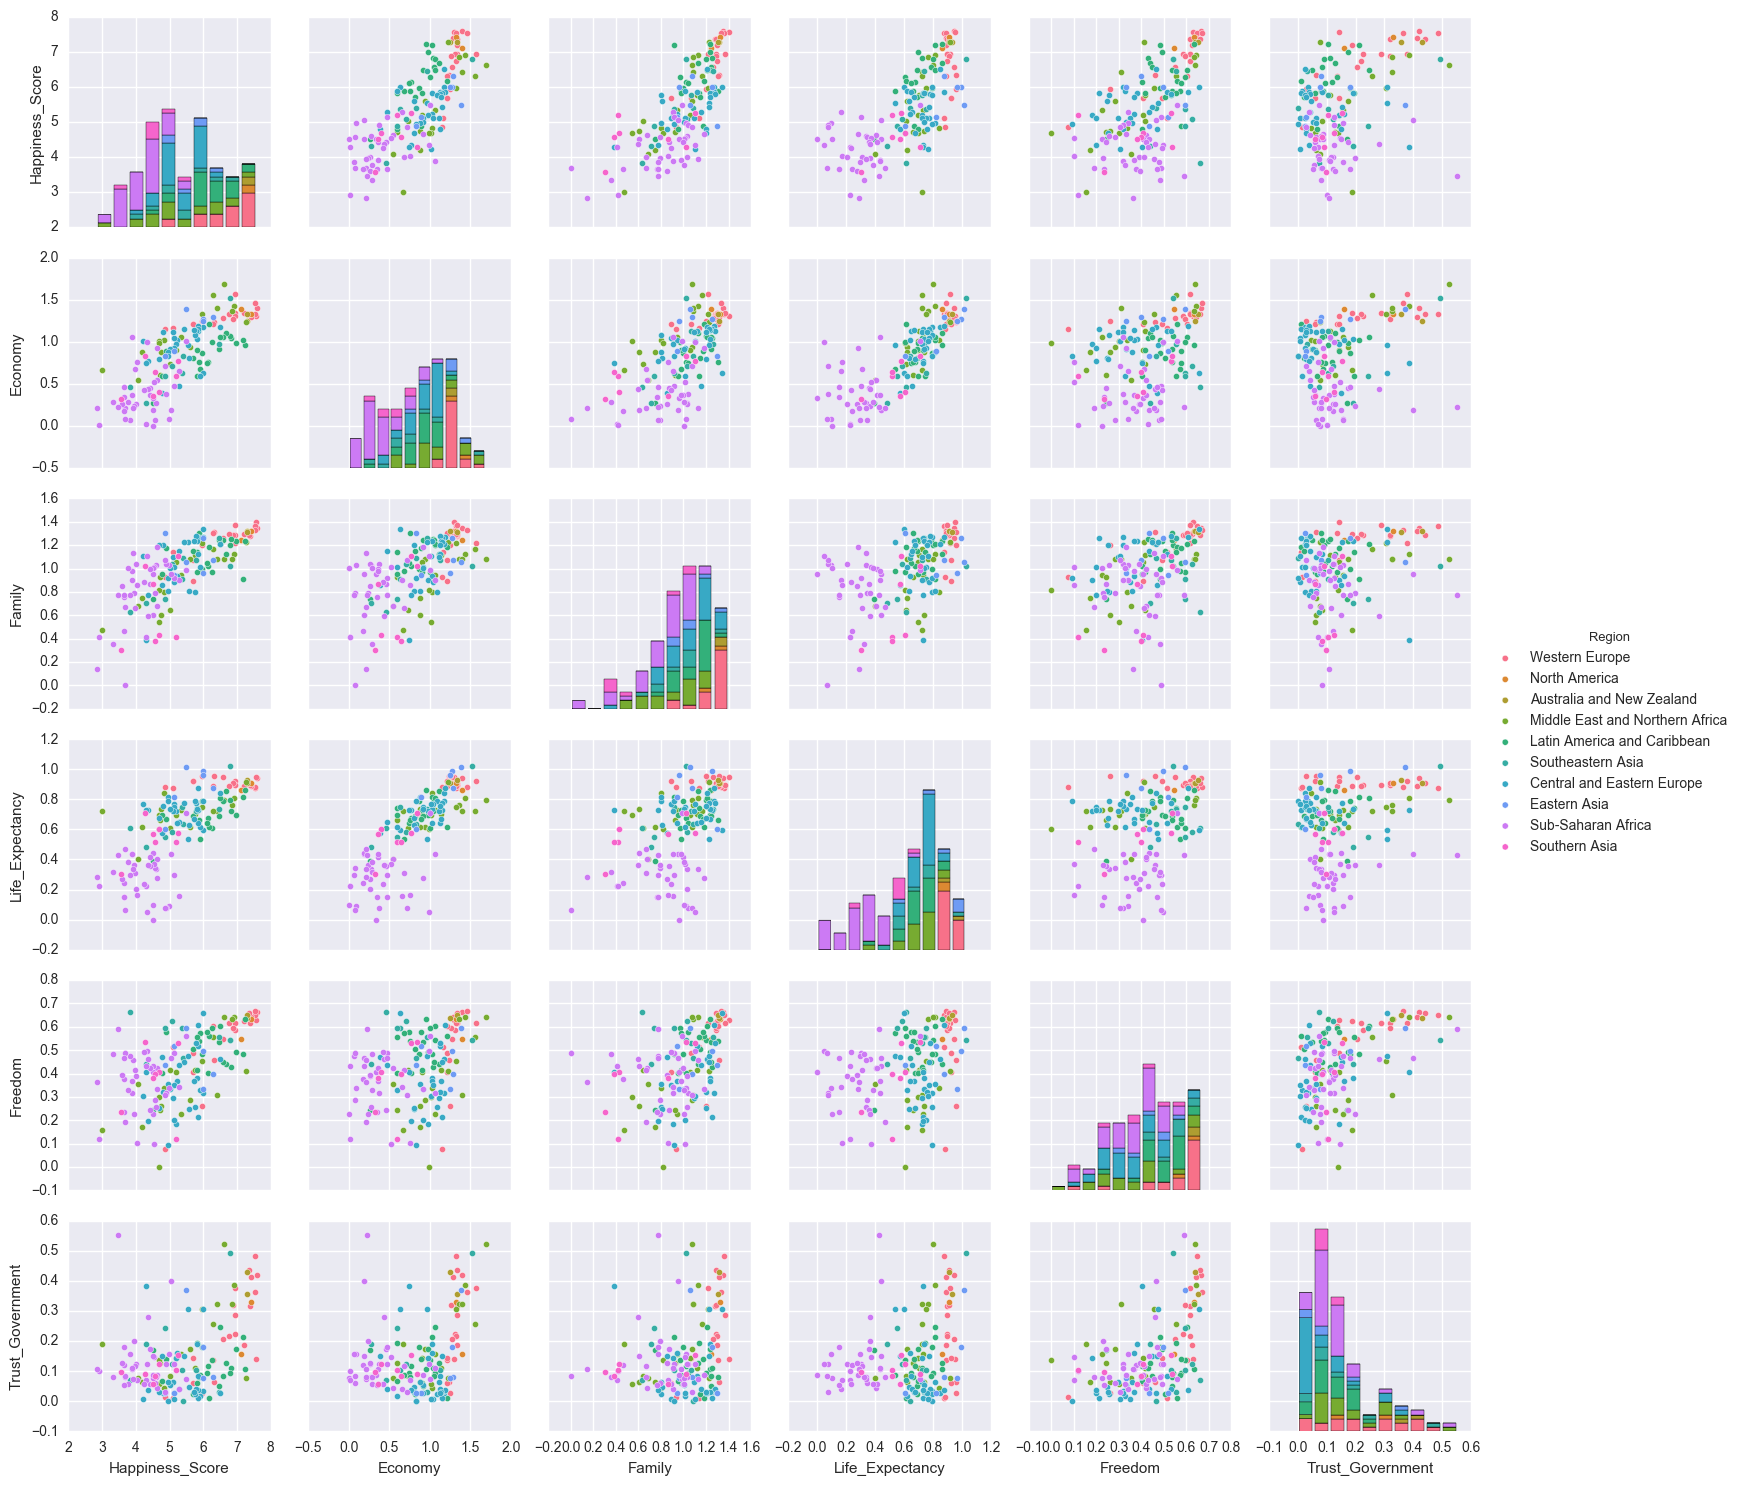

In [19]:
Cols=  ['Happiness_Score','Economy','Family','Life_Expectancy','Freedom','Trust_Government','Region']
sb.pairplot(hap[Cols], hue='Region',size=2.5)

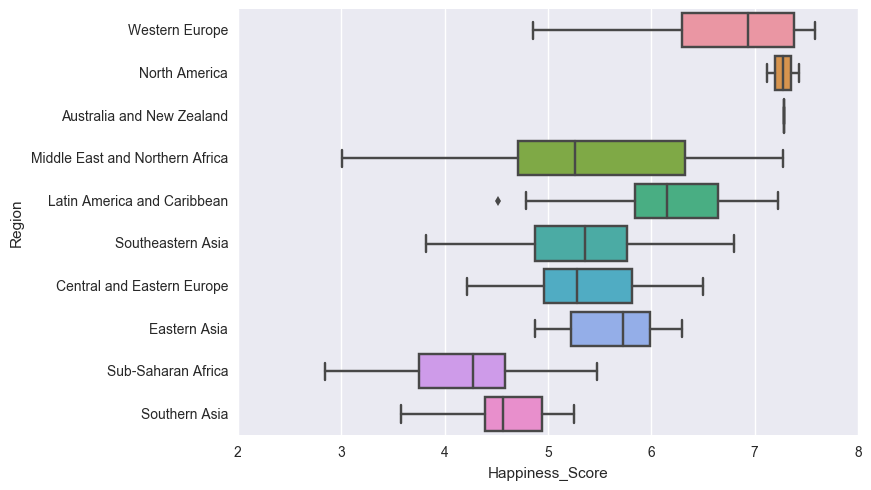

In [20]:
sb.boxplot(y='Region',x='Happiness_Score', data = hap)

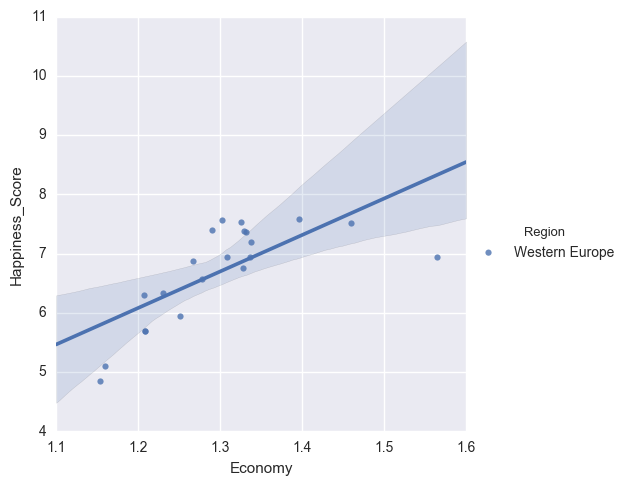

In [21]:
sb.lmplot(data=hapWE,x='Economy',y='Happiness_Score',hue="Region")

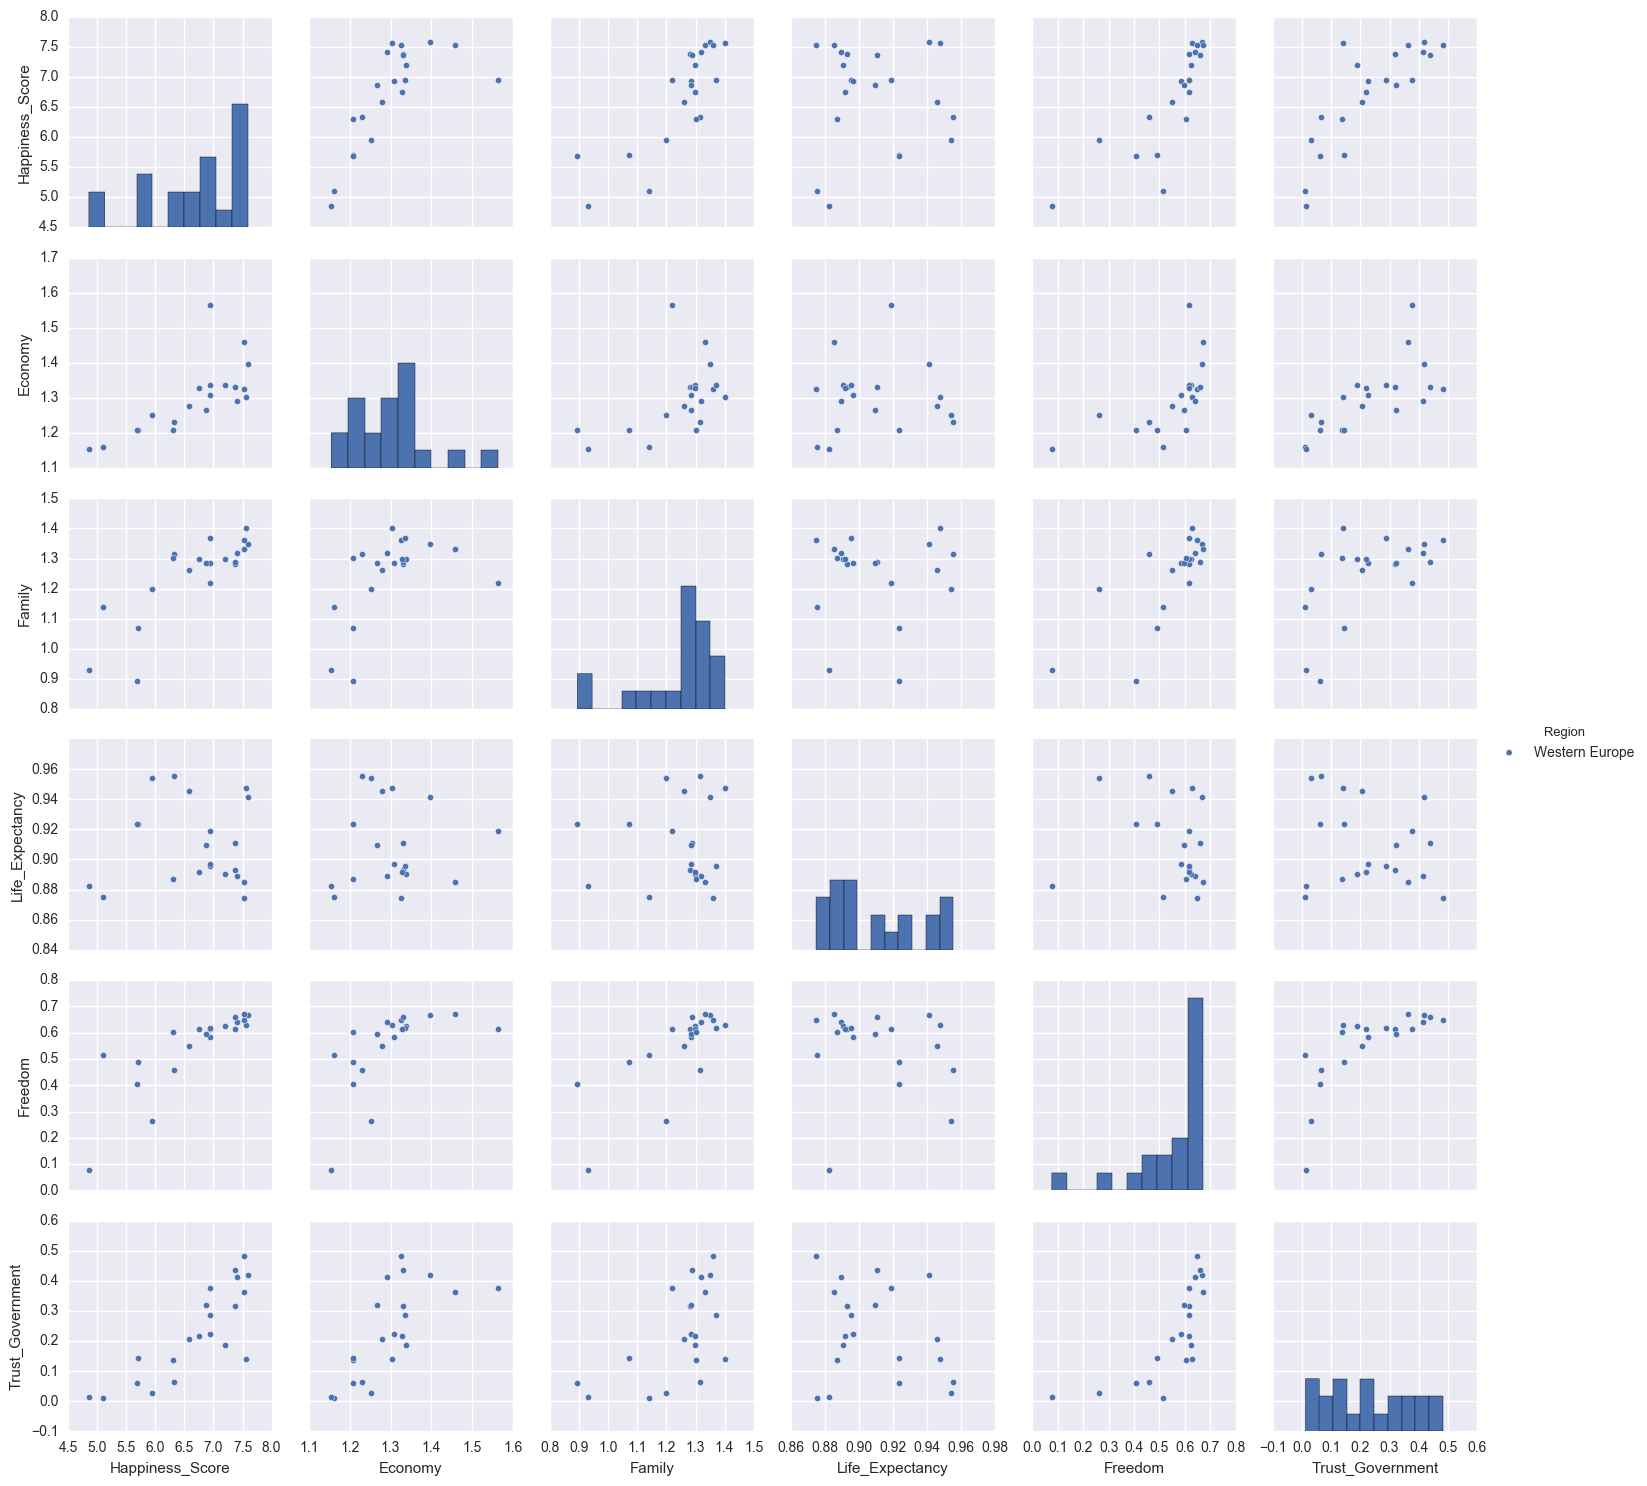

In [22]:
Cols=  ['Happiness_Score','Economy','Family','Life_Expectancy','Freedom','Trust_Government','Region']
sb.pairplot(hapWE[Cols], hue='Region',size=2.5)

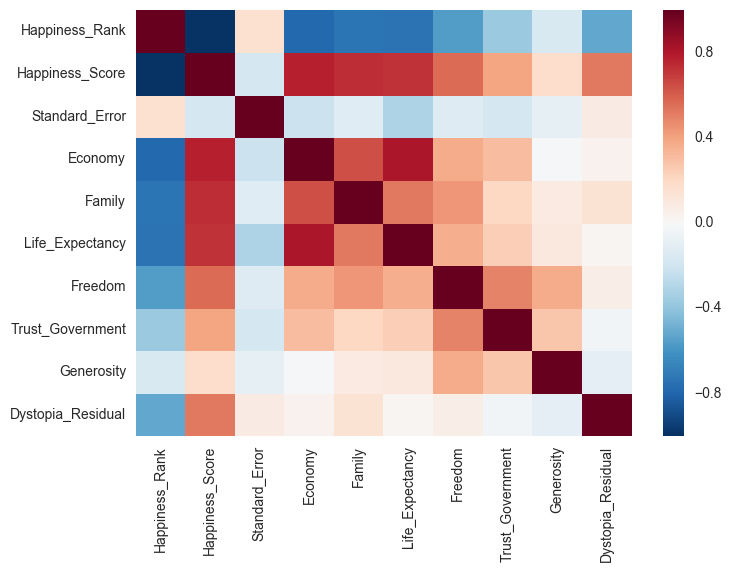

In [23]:
corr = hap.corr()
sb.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns) 

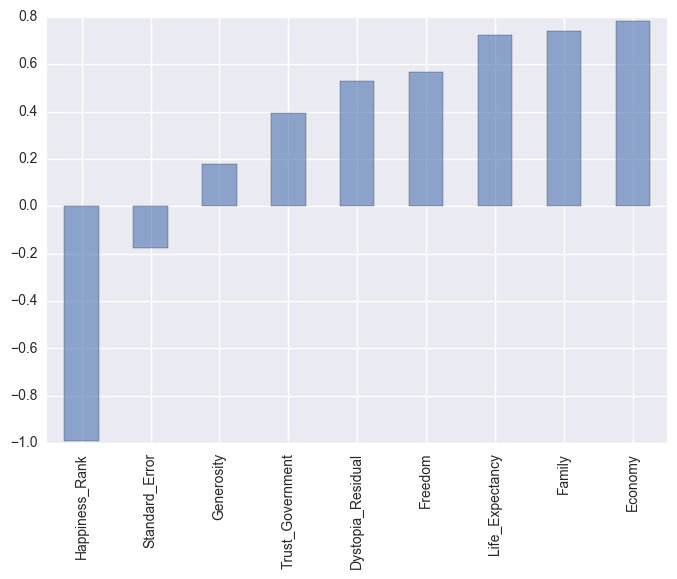

In [24]:
#Corelation to Happiness score

cor = hap.corr()['Happiness_Score'].copy()
cor = cor.drop('Happiness_Score')
cor.sort_values(inplace=True)
cor.plot(kind='bar', alpha=0.6)

In [25]:
co = hap.corr()
co = co["Happiness_Score"] # how features are corelated to happiness score 
co = co.sort_values()
co = co.drop('Happiness_Score')
print(co)

Happiness_Rank      -0.992105
Standard_Error      -0.177254
Generosity           0.180319
Trust_Government     0.395199
Dystopia_Residual    0.530474
Freedom              0.568211
Life_Expectancy      0.724200
Family               0.740605
Economy              0.780966
Name: Happiness_Score, dtype: float64


In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(hap[['Economy']], hap['Happiness_Score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predictions = lr.predict(hap[['Happiness_Score']])
predictions[0:5]

array([ 20.32849881,  20.27082491,  20.19540519,  20.18431405,  19.97358247])

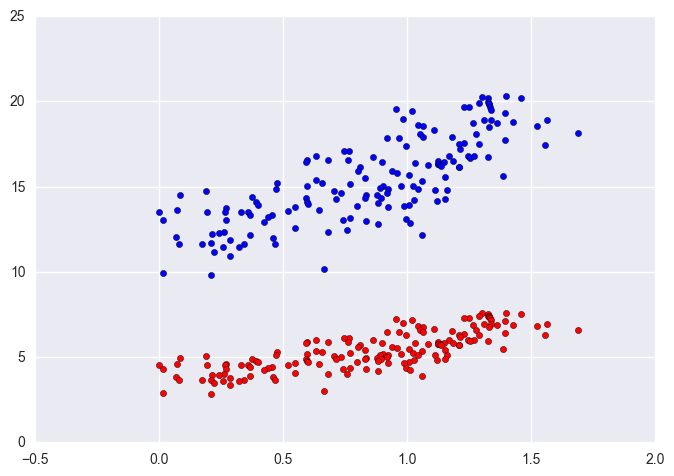

In [28]:
#Plotting the predictions
plt.scatter(hap['Economy'], hap['Happiness_Score'], c='red')
plt.scatter(hap['Economy'], predictions, c = 'blue')
plt.show()

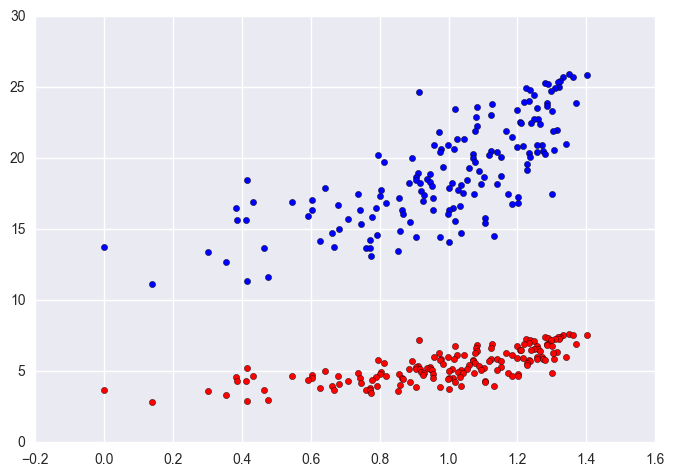

In [29]:
lr.fit(hap[['Family']], hap['Happiness_Score'])
predictions = lr.predict(hap[['Happiness_Score']])
predictions[0:5]
#Plotting the predictions
plt.scatter(hap['Family'], hap['Happiness_Score'], c='red')
plt.scatter(hap['Family'], predictions, c = 'blue')
plt.show()

In [30]:
features_list = ['Economy','Family','Life_Expectancy','Freedom']

In [31]:
train, test = train_test_split(hap, test_size = 0.3)
print(train.shape)
print(test.shape)

(110, 12)
(48, 12)


In [32]:
train_X = train[features_list] 
train_y=train.Happiness_Score

test_X= test[features_list] 
test_y =test.Happiness_Score   

In [33]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor(max_depth=2)
model1.fit(train_X,train_y)
predictions1=model1.predict(test_X)

featimp = pd.Series(model1.feature_importances_, index=features_list).sort_values(ascending=False)
print(featimp) 

Economy            0.700581
Freedom            0.203378
Family             0.096041
Life_Expectancy    0.000000
dtype: float64


In [34]:
from sklearn.metrics import accuracy_score
model2=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model2.fit(train_X,train_y)
predictions2=model2.predict(test_X)

print(predictions2[0:5])
print "Coeff:"
print model2.coef_
print "Intercept:"
print model2.intercept_
print "Train Score:"
print model2.score(train_X,train_y)
print "Test Score:"
print model2.score(test_X,test_y)

[ 6.69061613  4.05321136  5.80391192  5.79204959  6.99475334]
Coeff:
[ 0.8958521   1.43868343  1.08256883  2.06178287]
Intercept:
1.57453625973
Train Score:
0.791597653792
Test Score:
0.672225112858


In [35]:
# The coefficients
print('Coefficients: \n', model2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model2.predict(test_X) - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model2.score(test_X, test_y))


('Coefficients: \n', array([ 0.8958521 ,  1.43868343,  1.08256883,  2.06178287]))
Mean squared error: 0.34
Variance score: 0.67


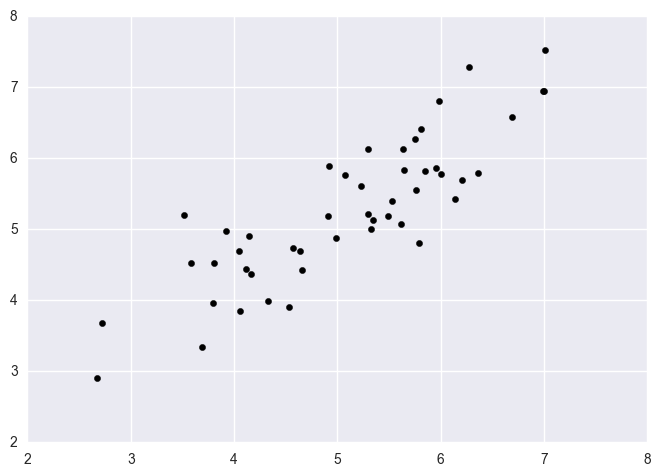

In [36]:
#Plot outputs
plt.scatter(model2.predict(test_X), test_y,  color='black')
plt.show()

In [37]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model3 = ensemble.GradientBoostingRegressor(**params)

model3.fit(train_X, train_y)
predictions3=model3.predict(test_X)
print(predictions3[0:5])
mse = mean_squared_error(test_y, model3.predict(test_X))
print("MSE: %.4f" % mse)

[ 6.69817572  4.32088739  5.55409431  5.19377642  7.30015808]
MSE: 0.3470


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(model3, train_X, train_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.13)


In [39]:
from sklearn import linear_model
model4 = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(train_X, train_y)
model4.fit(train_X, train_y)
predictions4=model4.predict(test_X)
print(predictions4[0:5])


[ 6.6821547   4.04390329  5.82183694  5.80350138  6.9859062 ]


In [40]:
scores = cross_val_score(model4, train_X, train_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.12)


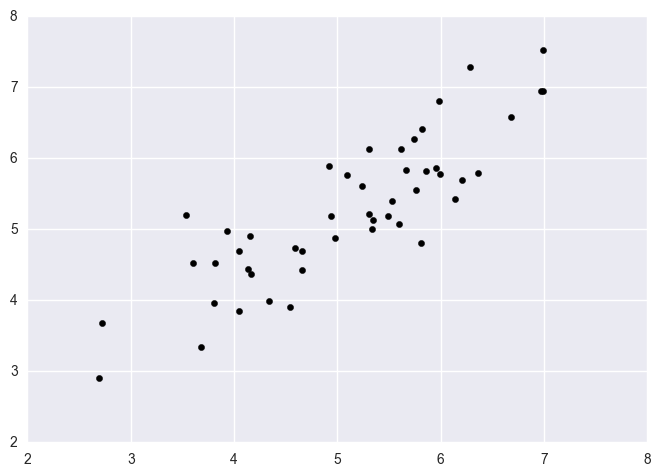

In [41]:
#Plot outputs
plt.scatter(model4.predict(test_X), test_y,  color='black')
plt.show()